In [5]:
from typing import TypedDict, List, Annotated
import operator
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image, display

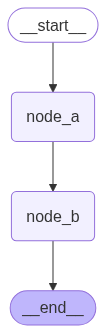

In [6]:
class State(TypedDict):
  value: Annotated[List[str], operator.add]

def node_a(state: State):
  return {"value": ["a"]}

def node_b(state: State):
  return {"value": ["b"]}

workflow = StateGraph(State)

workflow.add_node(node_a)
workflow.add_node(node_b)

workflow.add_edge(START, "node_a")
workflow.add_edge("node_a", "node_b")
workflow.add_edge("node_b", END)

graph = workflow.compile()

display(
  Image(
    graph.get_graph().draw_mermaid_png()
  )
)

In [7]:
graph.invoke({"value":[]})

{'value': ['a', 'b']}

Checkpoints

In [8]:
checkpointer = MemorySaver()
graph = workflow.compile(checkpointer=checkpointer)

In [9]:
config = {"configurable": {"thread_id": "1"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b']}

In [10]:
config = {"configurable": {"thread_id": "1"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b', 'a', 'b']}

In [11]:
config = {"configurable": {"thread_id": "2"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b']}

In [14]:
config = {"configurable": {"thread_id": "3"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b', 'a', 'b', 'a', 'b']}

In [15]:
list(graph.get_state_history({"configurable": {"thread_id": "1"}}))

[StateSnapshot(values={'value': ['a', 'b', 'a', 'b']}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f05383d-cd6a-6554-8006-db822ecd501a'}}, metadata={'source': 'loop', 'writes': {'node_b': {'value': ['b']}}, 'step': 6, 'parents': {}, 'thread_id': '1'}, created_at='2025-06-27T18:23:45.936103+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f05383d-cd69-6403-8005-d79b668f16f3'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'value': ['a', 'b', 'a']}, next=('node_b',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f05383d-cd69-6403-8005-d79b668f16f3'}}, metadata={'source': 'loop', 'writes': {'node_a': {'value': ['a']}}, 'step': 5, 'parents': {}, 'thread_id': '1'}, created_at='2025-06-27T18:23:45.935659+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f05383d-cd68-627e-8004-2f0e925e6ee2'}}, tasks=(PregelTas

In [16]:
list(graph.get_state_history({"configurable": {"thread_id": "2"}}))

[StateSnapshot(values={'value': ['a', 'b']}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f05383e-4465-66e7-8002-1c92af589370'}}, metadata={'source': 'loop', 'writes': {'node_b': {'value': ['b']}}, 'step': 2, 'parents': {}, 'thread_id': '2'}, created_at='2025-06-27T18:23:58.412151+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f05383e-4464-6897-8001-d42bf2b07ae9'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'value': ['a']}, next=('node_b',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f05383e-4464-6897-8001-d42bf2b07ae9'}}, metadata={'source': 'loop', 'writes': {'node_a': {'value': ['a']}}, 'step': 1, 'parents': {}, 'thread_id': '2'}, created_at='2025-06-27T18:23:58.411775+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f05383e-4462-681d-8000-051452164b92'}}, tasks=(PregelTask(id='862e2c4a-3e38-

In [17]:
list(graph.get_state_history({"configurable": {"thread_id": "3"}}))

[StateSnapshot(values={'value': ['a', 'b', 'a', 'b', 'a', 'b']}, next=(), config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f053841-9e24-6f9a-800a-9e26a8ad547e'}}, metadata={'source': 'loop', 'writes': {'node_b': {'value': ['b']}}, 'step': 10, 'parents': {}, 'thread_id': '3'}, created_at='2025-06-27T18:25:28.353571+00:00', parent_config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f053841-9e24-602a-8009-a9155014ee66'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'value': ['a', 'b', 'a', 'b', 'a']}, next=('node_b',), config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f053841-9e24-602a-8009-a9155014ee66'}}, metadata={'source': 'loop', 'writes': {'node_a': {'value': ['a']}}, 'step': 9, 'parents': {}, 'thread_id': '3'}, created_at='2025-06-27T18:25:28.353175+00:00', parent_config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f053841-9e22-6d64-8008-6292c163fddf